In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [66]:
df=pd.read_csv('/content/data.txt')
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [68]:
df['minutes_per_day']=df['Hours']*60
df['minutes_per_day']=df['minutes_per_day'].astype('int')

In [69]:
df.head()

,Hours,Scores,minutes_per_day
0,2.5,21,150
1,5.1,47,306
2,3.2,27,192
3,8.5,75,510
4,3.5,30,210


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Hours            25 non-null     float64
 1   Scores           25 non-null     int64  
 2   minutes_per_day  25 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 728.0 bytes


In [71]:
df=df.drop('Hours',axis=1)
df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Scores           25 non-null     int64
 1   minutes_per_day  25 non-null     int64
dtypes: int64(2)
memory usage: 600.0 bytes


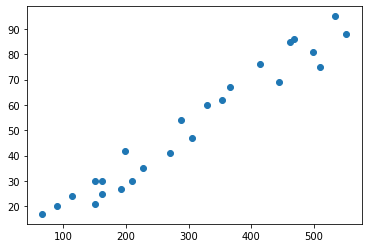

In [72]:
plt.scatter(df.minutes_per_day,df.Scores)

In [73]:
x_train,x_val,y_train,y_val=train_test_split(df.minutes_per_day, df.Scores,test_size=.1,random_state=42)

In [74]:
x_train=x_train.values.reshape(-1, 1)
x_val=x_val.values.reshape(-1, 1)

In [75]:
x_val.shape

(3, 1)

In [76]:
model=LinearRegression().fit(x_train,y_train)

In [77]:
model.score(x_train,y_train)

0.9487600938215678

In [78]:
model.score(x_val,y_val)

0.974047128713709

In [80]:
model2=LinearRegression()

In [86]:
scores=cross_val_score(model2,df.minutes_per_day.values.reshape(-1, 1),df.Scores,cv=3)
scores.mean()

0.9292424775400271

In [97]:
result=LinearRegression().fit(df.minutes_per_day.values.reshape(-1, 1),df.Scores).predict(np.array([[9.25*60],]))

In [102]:
print(f'The expected score is: {round(result[0])}')

The expected score is: 93
